In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
np.seterr(divide='ignore', invalid='ignore')


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# **Finding the Total Cost by Aircraft Type for the entire year and the Aircraft Type with the lowest cost per seat per km**

### Import excel sheets for Operations, AC Characteristics, City_pairs

In [2]:
operations = pd.read_excel(io="Data Science Case study Vindiata.xlsx", sheet_name= "Operations", header=3, index_col=1)
AC_char = pd.read_excel(io="Data Science Case study Vindiata.xlsx", sheet_name= "AC characteristics", header=3, index_col=1)
city_pairs = pd.read_excel(io="Data Science Case study Vindiata.xlsx", sheet_name= "City pairs", header=3, index_col=1).reset_index()


### Dropping Null values and renaming columns

In [3]:
operations = operations.dropna(axis=1)
AC_char = AC_char.dropna(axis=1)
city_pairs = city_pairs.dropna(axis=1)

operations.columns = ["Aircraft Type","Jan","Feb","Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
city_pairs.columns = ["Origin", "Destination","Passengers","Distance"]


### Aggregating Operations table for Airline A by Hours Flown for the entire year for each aircraft type.

In [4]:
months = operations.columns[1:]

operations=operations.groupby(["Aircraft Type"]).sum()
operations["Hours Flown"]= operations[months].sum(axis=1)
print(operations)
print(AC_char)
print(city_pairs)

                Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct  \
Aircraft Type                                                               
A320           1240  1245  1230  1255  1205  1215  1230  1220  1270  1270   
A330           1820  1826  1808  1838  1778  1790  1808  1796  1856  1856   
ATR72           795   799   787   807   767   775   787   779   819   819   
B737            985   989   977   997   957   965   977   969  1009  1009   
B747            920   923   914   929   899   905   914   908   938   938   
Q400            790   794   782   802   762   770   782   774   814   814   

                Nov   Dec  Hours Flown  
Aircraft Type                           
A320           1245  1250        14875  
A330           1826  1832        21834  
ATR72           799   803         9536  
B737            989   993        11816  
B747            923   926        11037  
Q400            794   798         9476  
               Range (Km)  Ave. Speed (km/h)  Number of

### Joining the Operations and AC Characteristics Table on Aircraft Type and keeping the relevant columns

In [5]:
lowest_cost = operations.join(AC_char, lsuffix='_caller', rsuffix='_other')
lowest_cost= lowest_cost[["Hours Flown","Costs per flight hour","Number of Seats", "Ave. Speed (km/h)","Range (Km)"]].reset_index()
print(lowest_cost)

  Aircraft Type  Hours Flown  Costs per flight hour  Number of Seats  \
0          A320        14875                   5000              150   
1          A330        21834                   7500              250   
2         ATR72         9536                   2750               75   
3          B737        11816                   5100              150   
4          B747        11037                  12000              350   
5          Q400         9476                   3500               90   

   Ave. Speed (km/h)  Range (Km)  
0                800        5000  
1                900        8000  
2                650        1000  
3                800        5000  
4                900       10000  
5                750        1500  


### Calculating Total Cost for each Aircraft Type 

#### *Total Cost = Hours Flown * Cost per flight hour*

The Total Cost for the Entire year by Aircraft Type is summarized in the table below
  Aircraft Type  Hours Flown  Costs per flight hour  Number of Seats  \
0          A320        14875                   5000              150   
1          A330        21834                   7500              250   
2         ATR72         9536                   2750               75   
3          B737        11816                   5100              150   
4          B747        11037                  12000              350   
5          Q400         9476                   3500               90   

   Ave. Speed (km/h)  Range (Km)  Total Costs  
0                800        5000     74375000  
1                900        8000    163755000  
2                650        1000     26224000  
3                800        5000     60261600  
4                900       10000    132444000  
5                750        1500     33166000  


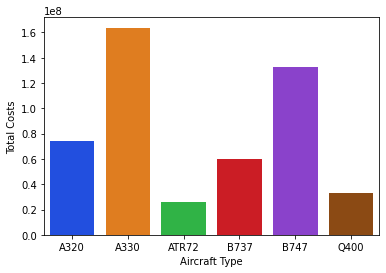

In [6]:
lowest_cost["Total Costs"] = lowest_cost["Hours Flown"] * lowest_cost["Costs per flight hour"]

print("The Total Cost for the Entire year by Aircraft Type is summarized in the table below")
print(lowest_cost)
fig = sns.barplot(x = lowest_cost["Aircraft Type"], y = lowest_cost["Total Costs"], data = lowest_cost, palette = 'bright')


### Calculating the Cost per Hour per Km by Aircraft Type

#### *Cost per Seat per Km = Total Costs/(Number of Seats * Hours Flown * Average Speed)*

The lowest Cost per seat per km is of Aircraft Type 1
  Aircraft Type  Hours Flown  Costs per flight hour  Number of Seats  \
1          A330        21834                   7500              250   
4          B747        11037                  12000              350   
0          A320        14875                   5000              150   
3          B737        11816                   5100              150   
5          Q400         9476                   3500               90   
2         ATR72         9536                   2750               75   

   Ave. Speed (km/h)  Range (Km)  Total Costs  Cost per seat per km  
1                900        8000    163755000                0.0333  
4                900       10000    132444000                0.0381  
0                800        5000     74375000                0.0417  
3                800        5000     60261600                0.0425  
5                750        1500     33166000                0.0519  
2                650 

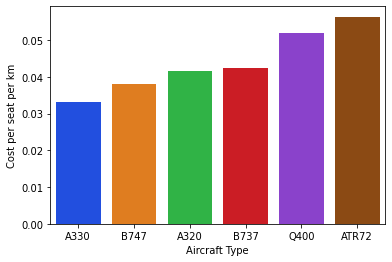

In [7]:
lowest_cost["Cost per seat per km"] = round(lowest_cost["Total Costs"]/(lowest_cost["Number of Seats"]*lowest_cost["Hours Flown"]*lowest_cost["Ave. Speed (km/h)"]),4)
lowest_cost = lowest_cost.sort_values("Cost per seat per km", ascending=True)
fig = sns.barplot(x = lowest_cost["Aircraft Type"], y = lowest_cost["Cost per seat per km"], data = lowest_cost, palette = 'bright')


print(f"The lowest Cost per seat per km is of Aircraft Type {lowest_cost.index[0]}")
print(lowest_cost)

In [8]:
print("---------------------------------------------------------------------------------------------------------------------------------------------")

---------------------------------------------------------------------------------------------------------------------------------------------


# **Finding the most optimal Aircraft Type for each City-Pair by Range, Passenger Demand and Cost**

### Modifying the lowest_cost table to keep relevant columns

In [9]:
cost = lowest_cost.drop(['Hours Flown', 'Costs per flight hour', 'Total Costs',"Ave. Speed (km/h)"],axis=1).reset_index()
print(cost)

   index Aircraft Type  Number of Seats  Range (Km)  Cost per seat per km
0      1          A330              250        8000                0.0333
1      4          B747              350       10000                0.0381
2      0          A320              150        5000                0.0417
3      3          B737              150        5000                0.0425
4      5          Q400               90        1500                0.0519
5      2         ATR72               75        1000                0.0564


### Iterating over city pairs table and generating the cost for each aircraft type for each city pair.

#### *lowest cost = (cost per seat per km * number of seats * distance * number of trips)*

#### *number of trips = passengers/number of seats*


In [10]:
for source,destination,passengers,distance in city_pairs.itertuples(index=False):
    cost[source + "-" + destination + ' cost'] = np.where(cost["Range (Km)"] >= distance, (cost["Cost per seat per km"] * cost["Number of Seats"] * distance * np.ceil(passengers/cost["Number of Seats"])).astype(int), "NaN")
print(cost)

   index Aircraft Type  Number of Seats  Range (Km)  Cost per seat per km  \
0      1          A330              250        8000                0.0333   
1      4          B747              350       10000                0.0381   
2      0          A320              150        5000                0.0417   
3      3          B737              150        5000                0.0425   
4      5          Q400               90        1500                0.0519   
5      2         ATR72               75        1000                0.0564   

  AA-BB cost BB-CC cost CC-AA cost AA-DD cost  
0      49950     108225       6660      16650  
1      80010     173355       5334      13335  
2      56295        NaN       5004      12510  
3      57375        NaN       5100      12750  
4        NaN        NaN       7473      18684  
5        NaN        NaN       6767      16919  


## Finding the most optimal aircraft type for each city pair 

In [11]:
AA_BB = cost.sort_values("AA-BB cost", ascending=True).iloc[0,0]
BB_CC = cost.sort_values("BB-CC cost", ascending=True).iloc[0,0]
CC_AA = cost.sort_values("CC-AA cost", ascending=True).iloc[0,0]
AA_DD = cost.sort_values("AA-DD cost", ascending=True).iloc[0,0]

optimal = pd.DataFrame(columns=["Optimal Flight","No. of Trips"])
optimal["Optimal Flight"] =[AA_BB,BB_CC,CC_AA,AA_DD]
optimal["No. of Trips"] = np.ceil(city_pairs["Passengers"]/cost["Number of Seats"])

print(optimal)

print(f"The most optimal flights for city-pairs AA-BB, BB-CC, CC-DD, AA-DD are {AA_BB}, {BB_CC}, {CC_AA}, {AA_DD} respectively ")


   Optimal Flight  No. of Trips
0               1           2.0
1               1           2.0
2               0           2.0
3               0           2.0
The most optimal flights for city-pairs AA-BB, BB-CC, CC-DD, AA-DD are 1, 1, 0, 0 respectively 


### <font color='Blue'>The most optimal flights for city-pairs </font><font color='Red'>AA-BB, BB-CC, CC-DD, AA-DD are A330, A330, A320, A320 </font> <font color="Blue">respectively</font>

